In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [7]:
# define initial values

cDNA = 10.0 #nM
ctel = 2.0 #nM 
Kd1 = 2.2 #nM - CST-DNA
Kd2 =  0.324 #nM - telomerase-DNA
gamma = 0.465 #activity coefficient


dna_conc = np.array([5.,10.,25.,50.,100.,200.])       # experimental DNA concentrations (in nM)
IC50_ex = np.array([29, 67, 115, 264, 558, 1367])*3   # experimental CST IC50 values (in nM)


# define exact Competitve Binding Equation

def eq4(cCST,cDNA=cDNA,gamma=gamma,Kd1=Kd1,Kd2=Kd2,ctel=ctel): 
    '''
    inputs: np.array of CST concentrations, DNA concentration, Telomerase concentration,
    Kds for Tel.DNA and CST.DNA
    outputs: normalized fraction bound (Tel.DNA)'''
    
    cCST = gamma*cCST
    
    a = np.array(Kd1 + Kd2 + cCST + ctel - cDNA)
    b = np.array(Kd2*(cCST-cDNA) + Kd1*(ctel-cDNA) + Kd1*Kd2)
    c = -Kd1*Kd2*cDNA
    theta = np.arccos( ((-2.0*a**3)+9*a*b-27*c)/(2*np.sqrt( (a**2-3*b)**3)) )


    ctel_cDNA = (ctel*(2*np.sqrt(a**2-3*b)*np.cos(theta/3)-a))/(3*Kd2+2*np.sqrt(a**2-3*b)*np.cos(theta/3)-a) #nM
    cCST_DNA = (cCST*(2*np.sqrt(a**2-3*b)*np.cos(theta/3)-a))/(3*Kd1+2*np.sqrt(a**2-3*b)*np.cos(theta/3)-a)  #nM
    cDNA_free = -(a/3) + (2/3)*np.sqrt(a**2-3*b)*np.cos(theta/3)   #nM

    eq4_fractionbound_1 = ctel_cDNA/cDNA
    eq4_fractionbound_n_1 = eq4_fractionbound_1/np.max(eq4_fractionbound_1)
    
    cCST = cCST/gamma
    
    
    return eq4_fractionbound_n_1

In [8]:
def find_nearest(DNA,Kd_CST,Kd_Tel,gamma=gamma,value=0.5):
    '''
    Finds [CST] at which the fraction bound is closest to the given value.
    inputs:  array of CST values, DNA concentration, Kd_CST, Kd_Tel, gamma, value (set to 0.5)
    outputs: single concentration of CST
    '''
    
    aCST = np.linspace(10,10000,10000)
    eq4_fb = eq4(cCST=aCST,cDNA=DNA,Kd1 = Kd_CST,Kd2 = Kd_Tel,gamma=gamma)

    dif = np.abs(eq4_fb-value)
    nearest = np.min(dif)
    index = np.where(dif == nearest)
    IC50 = aCST[index]


    return float(IC50)


def calc_IC50(Kd_CST,Kd_Tel,gamma=gamma,value=0.5,dna_conc=dna_conc):
    '''
    Calculates the IC50 value for each element of an input array or list of DNA concentrations.
    '''
    IC50_list = []
    
    for dna in dna_conc:
        IC = find_nearest(value=0.5,DNA=dna,Kd_CST=Kd_CST,Kd_Tel=Kd_Tel,gamma=gamma)
        IC50_list.append(IC)
        
    return(IC50_list)

In [9]:
# calculate IC50 values given the best Kd

IC50_FA = calc_IC50(Kd_Tel=0.324,Kd_CST=2.2,gamma=.465)


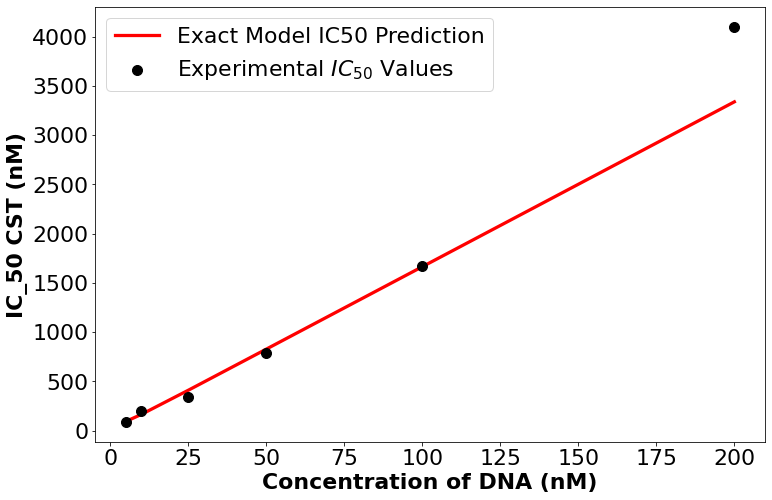

In [11]:
# and PLOT! 

matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'

plt.figure(figsize=(12,8))
plt.rc('font', size=22) 

plt.plot(dna_conc,IC50_FA,c = 'red',linewidth=3.25,zorder=0,\
         label = 'Exact Model IC50 Prediction' )


plt.scatter(dna_conc,IC50_ex,c = 'black',marker = 'o', s = 100,label = 'Experimental $IC_{50}$ Values')


plt.legend()
plt.xlabel('Concentration of DNA (nM)',fontweight='bold')
plt.ylabel('IC_50 CST (nM)',fontweight='bold');

